# RAMP AQ Data

RAMP AQ data from the WFRT rooftop is read in with the function below..

Today is 2022-09-16.
100% [..............................................................................] 88427 / 88427
100% [............................................................................] 747555 / 747555

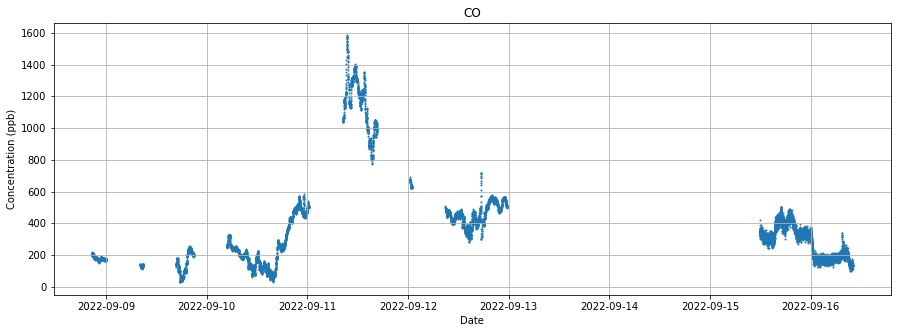

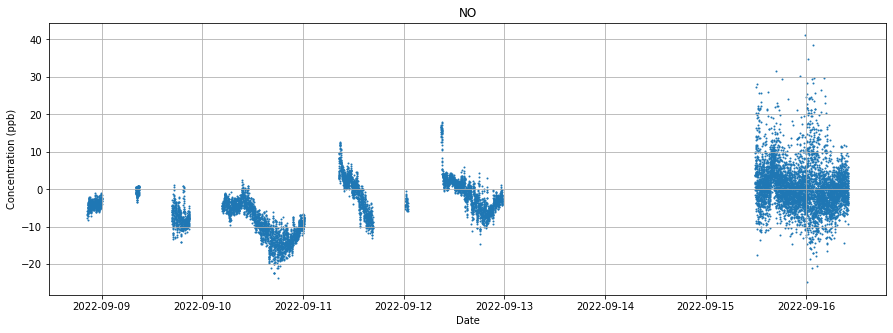

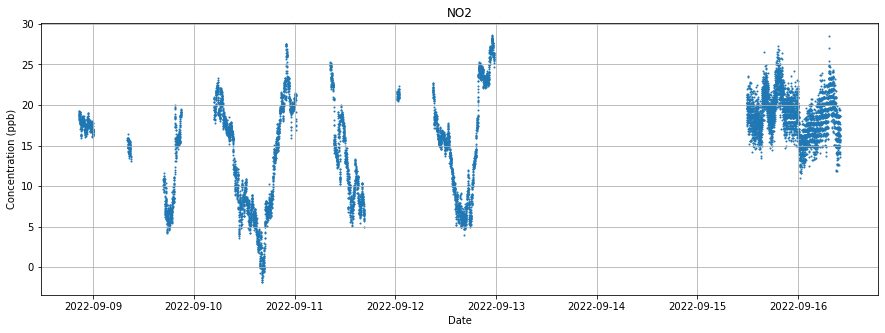

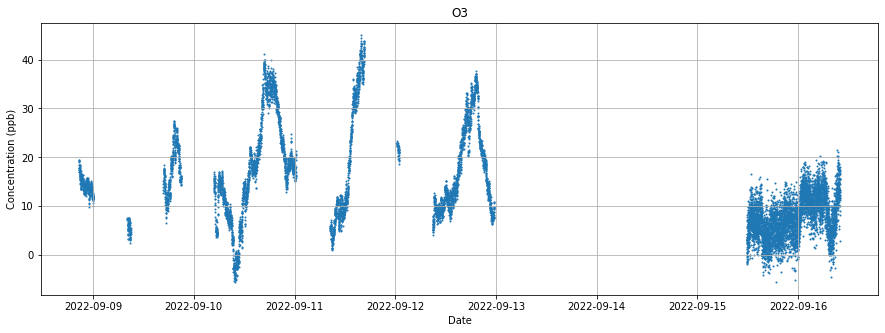

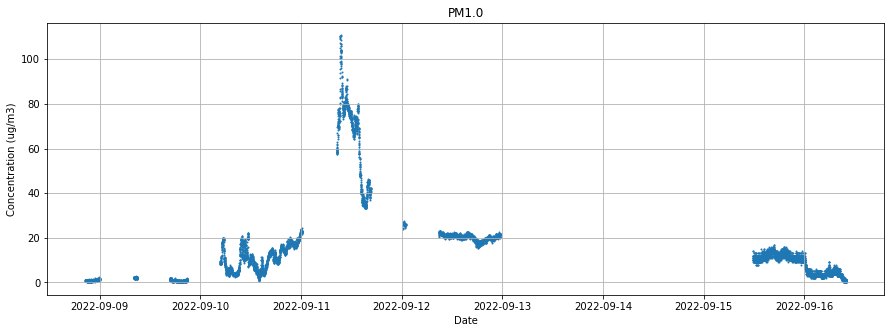

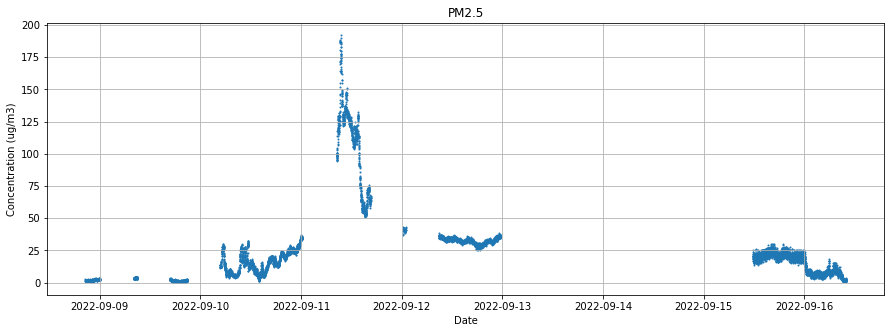

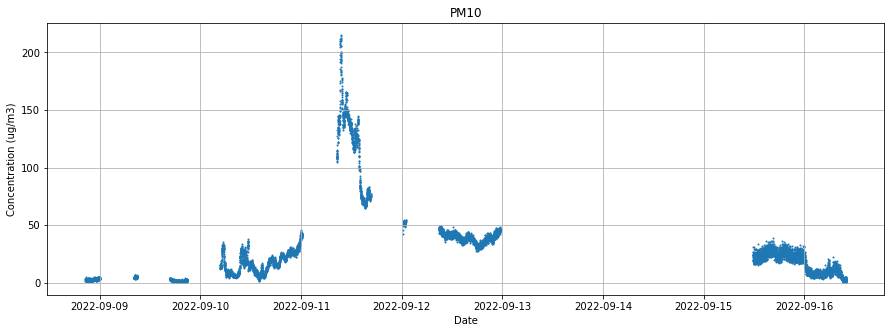

In [1]:
from func import run

run()